<h1 style='color:purple' align='center'>Naive Bayes Tutorial Part 1: Predicting survival from titanic crash</h1>

# 1. Load Python Modules

In [291]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# 2. Read the Dataset from CSV file  - Using Pandas

In [292]:
file_path=r"titanic.csv"
titanic_df = pd.read_csv(file_path)
titanic_df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [293]:
#drop - sensitive - non imp columns
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


# 3. Basic Inspection on given dataset

In [294]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())

basic_inspection_dataset(titanic_df)

top 5 rows - using head
   Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked  Survived
0       3    male  22.0      1      0   7.2500   NaN        S         0
1       1  female  38.0      1      0  71.2833   C85        C         1
2       3  female  26.0      0      0   7.9250   NaN        S         1
3       1  female  35.0      1      0  53.1000  C123        S         1
4       3    male  35.0      0      0   8.0500   NaN        S         0

bottom 5 rows using tail
     Pclass     Sex   Age  SibSp  Parch   Fare Cabin Embarked  Survived
886       2    male  27.0      0      0  13.00   NaN        S         0
887       1  female  19.0      0      0  30.00   B42        S         1
888       3  female   NaN      1      2  23.45   NaN        S         0
889       1    male  26.0      0      0  30.00  C148        C         1
890       3    male  32.0      0      0   7.75   NaN        Q         0

numbers of samples and columns
(891, 9)

numbers of samples 
891

numbers of entries 

In [295]:
titanic_df.drop(['Cabin','Embarked'],axis=1,inplace=True)
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


# 4. Handling Missing Values - Cat - Variables

In [296]:
# No Missing Values - I am skipping this section
titanic_df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [297]:
## conver to cat - object data type
titanic_df["Pclass"]=titanic_df["Pclass"].astype("object")
titanic_df["Survived"]=titanic_df["Survived"].astype("object")
titanic_df["SibSp"]=titanic_df["SibSp"].astype("object")
titanic_df["Parch"]=titanic_df["Parch"].astype("object")
#titanic_df["Embarked"]=titanic_df["Embarked"].astype("object")

In [298]:
titanic_df.dtypes

Pclass       object
Sex          object
Age         float64
SibSp        object
Parch        object
Fare        float64
Survived     object
dtype: object

In [299]:
#titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode(),inplace=True)

# 5. Categorical- Variable - Analysis -Using Pipeline

In [300]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

Pclass frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   3   |    491    |
| 1 |   1   |    216    |
| 2 |   2   |    184    |
+---+-------+-----------+
Pclass Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  3.0  |   491.0   |        55.11         |
| 1 |  1.0  |   216.0   |        24.24         |
| 2 |  2.0  |   184.0   |        20.65         |
+---+-------+-----------+----------------------+


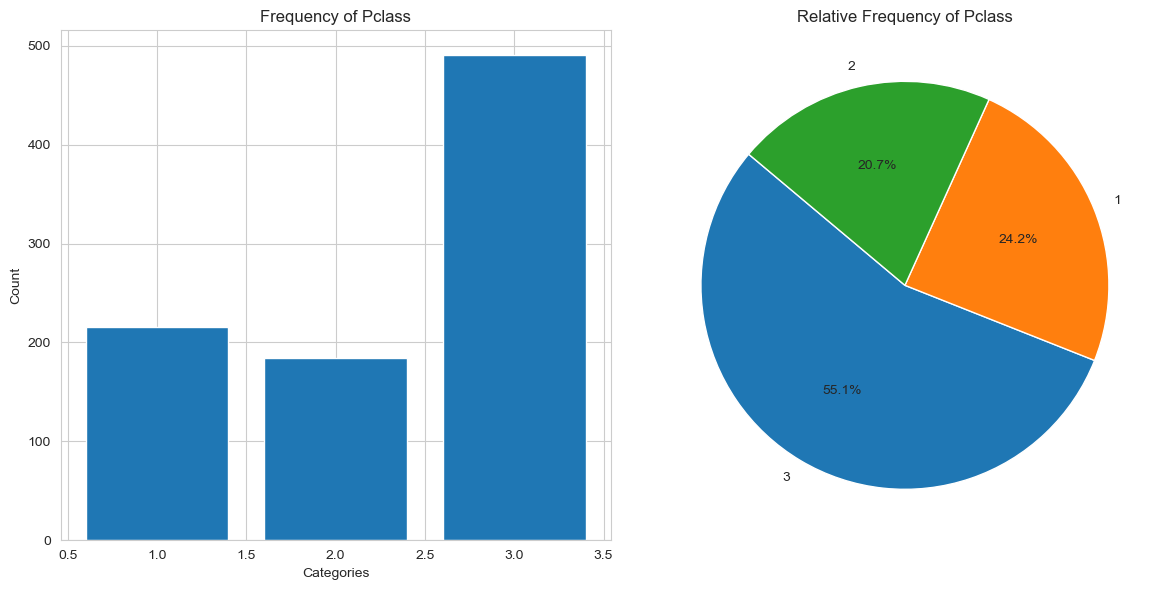

Sex frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 |  male  |    577    |
| 1 | female |    314    |
+---+--------+-----------+
Sex Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 |  male  |    577    |        64.76         |
| 1 | female |    314    |        35.24         |
+---+--------+-----------+----------------------+


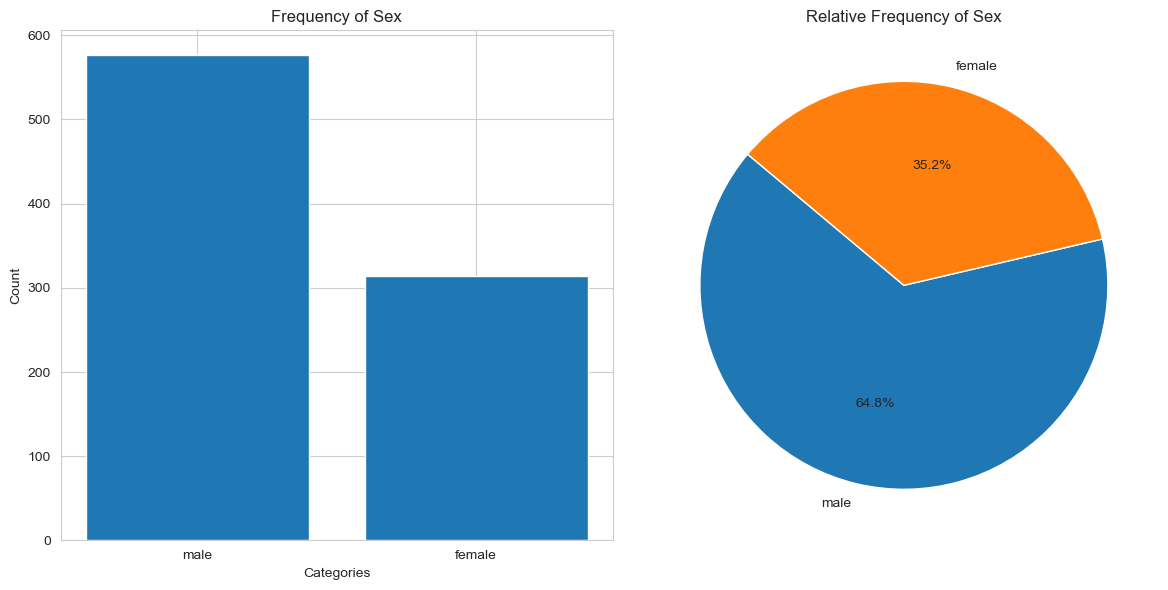

SibSp frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    608    |
| 1 |   1   |    209    |
| 2 |   2   |    28     |
| 3 |   4   |    18     |
| 4 |   3   |    16     |
| 5 |   8   |     7     |
| 6 |   5   |     5     |
+---+-------+-----------+
SibSp Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  0.0  |   608.0   |        68.24         |
| 1 |  1.0  |   209.0   |        23.46         |
| 2 |  2.0  |   28.0    |         3.14         |
| 3 |  4.0  |   18.0    |         2.02         |
| 4 |  3.0  |   16.0    |         1.8          |
| 5 |  8.0  |    7.0    |         0.79         |
| 6 |  5.0  |    5.0    |         0.56         |
+---+-------+-----------+----------------------+


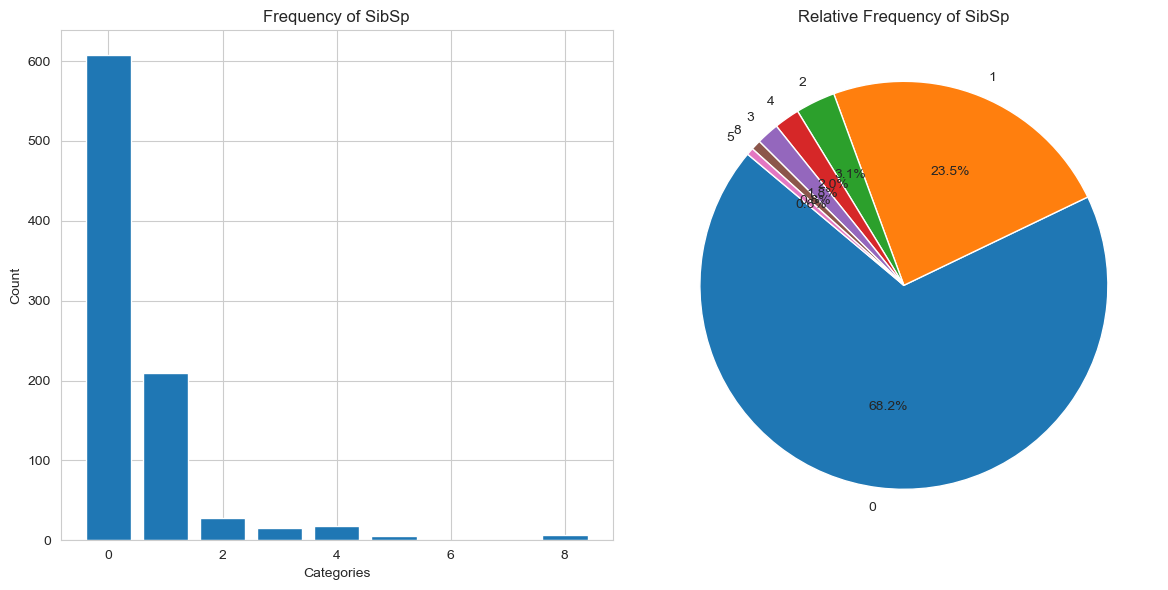

Parch frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    678    |
| 1 |   1   |    118    |
| 2 |   2   |    80     |
| 3 |   5   |     5     |
| 4 |   3   |     5     |
| 5 |   4   |     4     |
| 6 |   6   |     1     |
+---+-------+-----------+
Parch Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  0.0  |   678.0   |        76.09         |
| 1 |  1.0  |   118.0   |        13.24         |
| 2 |  2.0  |   80.0    |         8.98         |
| 3 |  5.0  |    5.0    |         0.56         |
| 4 |  3.0  |    5.0    |         0.56         |
| 5 |  4.0  |    4.0    |         0.45         |
| 6 |  6.0  |    1.0    |         0.11         |
+---+-------+-----------+----------------------+


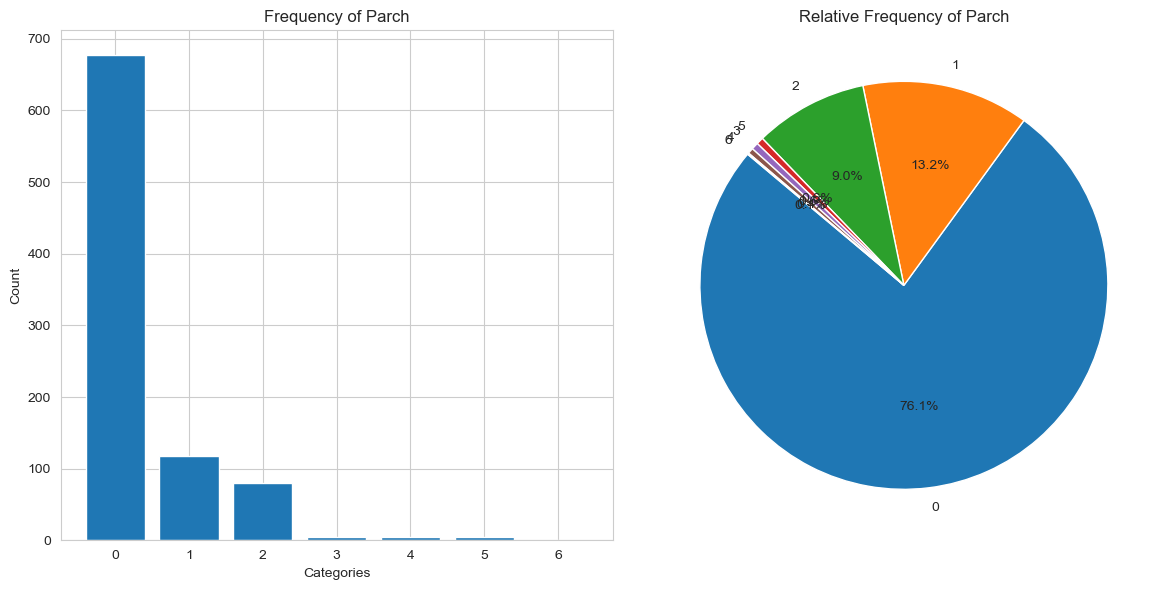

Survived frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    549    |
| 1 |   1   |    342    |
+---+-------+-----------+
Survived Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  0.0  |   549.0   |        61.62         |
| 1 |  1.0  |   342.0   |        38.38         |
+---+-------+-----------+----------------------+


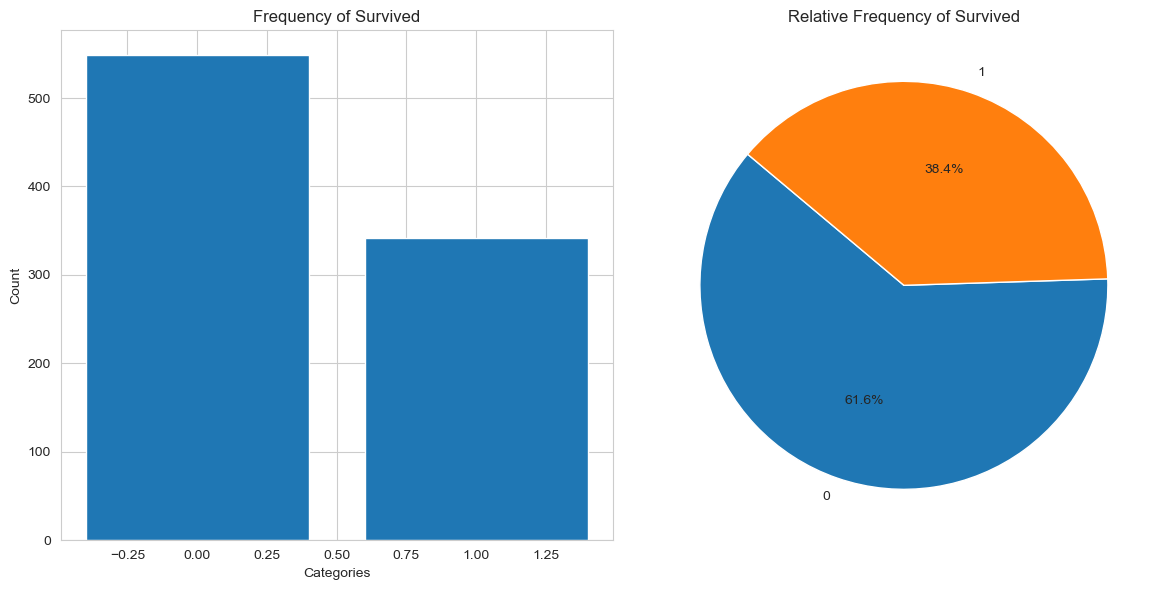

In [301]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(titanic_df)

# 6. Handling Missing Values in Numerical Columns

In [302]:
titanic_df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [303]:
#filling with mean/median
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())
titanic_df.head()
titanic_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [304]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                        
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var],  color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()

        
        

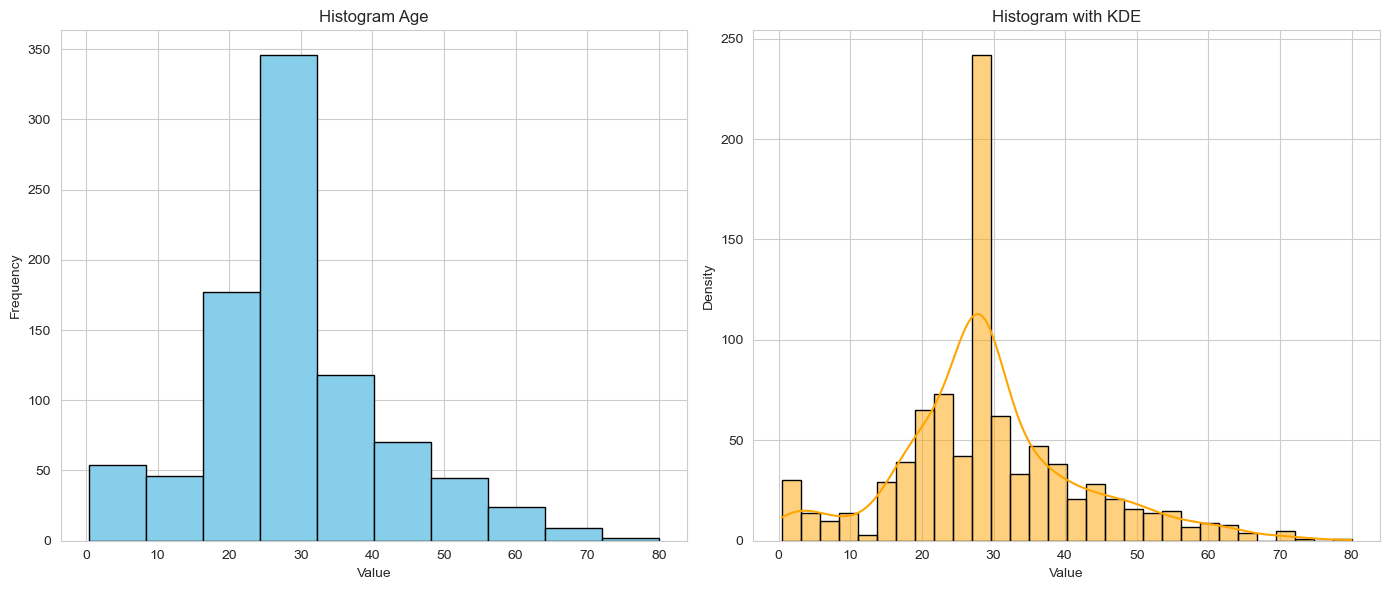

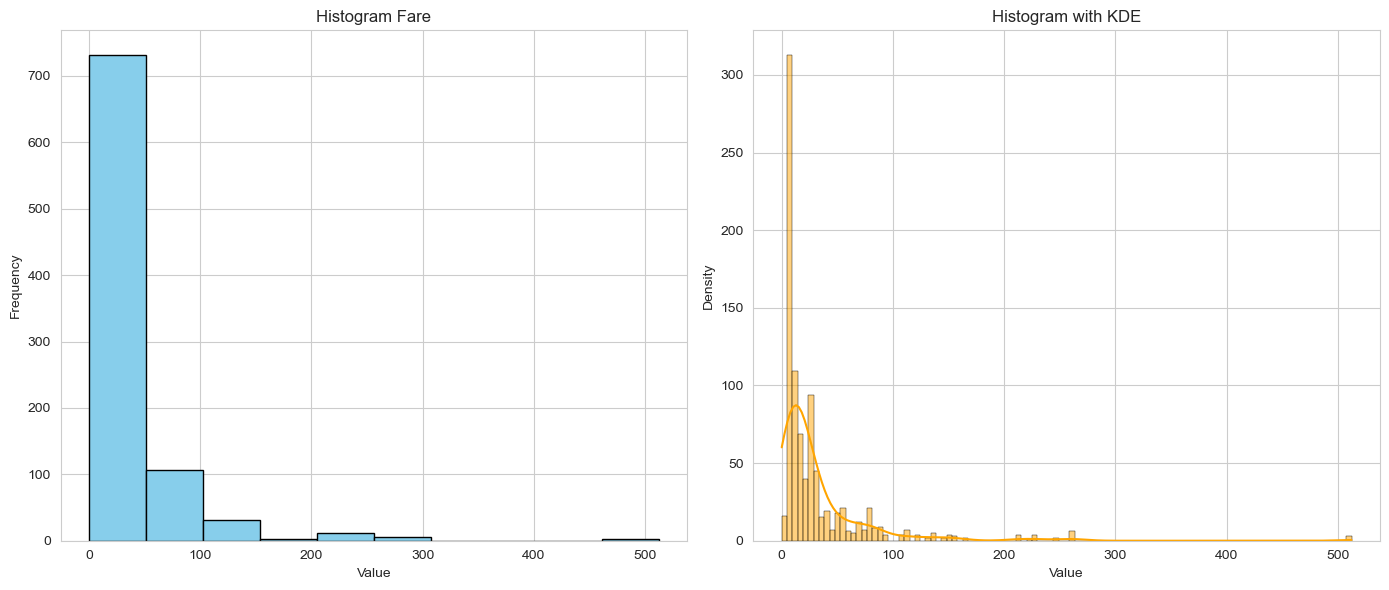

In [305]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(titanic_df)

# 8. Numerical - Variables -Outliers Analysis

In [306]:
def find_outliers(con_var):
    """find outliers and remove the outliers from the dataset for given var - feature"""
    print(f"Original-dataset for {con_var} ,{len(titanic_df)}")
    
    #plt.boxplot(visa_df[con_var])
    
    q1 = titanic_df[con_var].quantile(0.25)
    q3 = titanic_df[con_var].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5*iqr)
    higher_fence = q3 + (1.5*iqr)

    cond1 = titanic_df[con_var] > lower_fence
    cond2 = titanic_df[con_var] < higher_fence

    df = titanic_df[ cond1 & cond2]
    print(f"Modifed dataset len after removing the outliers- for {con_var},  {len(df)}")
    diff = len(titanic_df) - len(df)
    print("Outliers observations length", diff)
    
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed


    plt.subplot(2, 2, 1)
    plt.boxplot(titanic_df[con_var])
    plt.subplot(2, 2, 2)
    plt.hist(x=titanic_df[con_var], bins=20)


    
    #filling with median
    median = titanic_df[con_var].median()
    titanic_df[con_var] = titanic_df[con_var].map(lambda x: median if x < lower_fence  else x)
    titanic_df[con_var] = titanic_df[con_var].map(lambda x: median if x > higher_fence  else x)
    plt.subplot(2, 2, 3)
    plt.boxplot(titanic_df[con_var])
    plt.subplot(2, 2, 4)
    plt.hist(x=titanic_df[con_var], bins=40)
    
    plt.tight_layout()  # Adjust subplot parameters to give specified padding
    plt.show()

    
    

In [307]:
titanic_df.select_dtypes(exclude="object").columns


Index(['Age', 'Fare'], dtype='object')

Original-dataset for Age ,891
Modifed dataset len after removing the outliers- for Age,  825
Outliers observations length 66


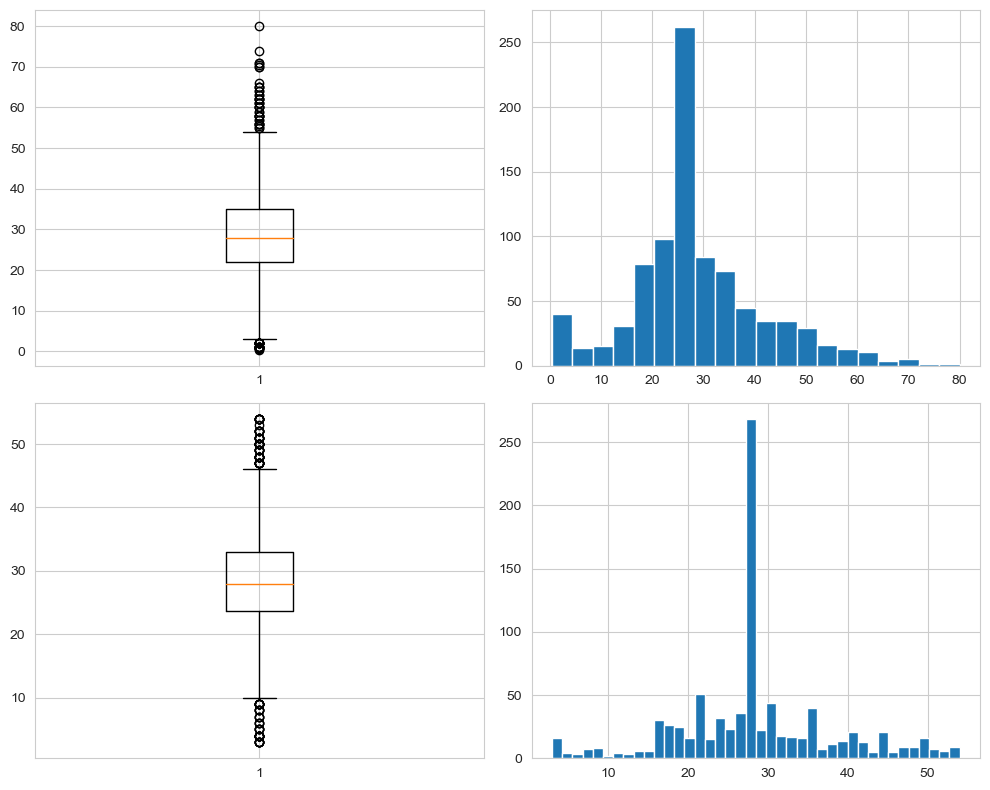

Original-dataset for Fare ,891
Modifed dataset len after removing the outliers- for Fare,  775
Outliers observations length 116


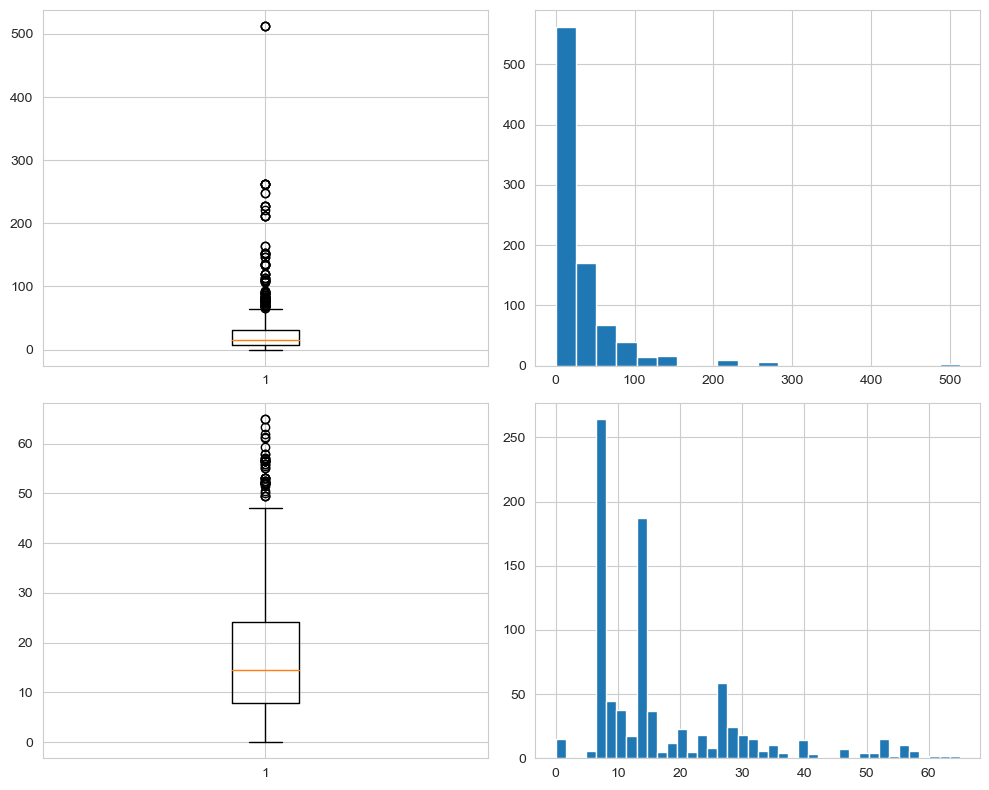

In [308]:
num_vars = ['Age', 'Fare']
for i in num_vars:
    find_outliers(i)

# 9. Bi Variate Analyis

In [309]:
cat_vars = titanic_df.select_dtypes(include="object").columns
cat_vars

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Survived'], dtype='object')

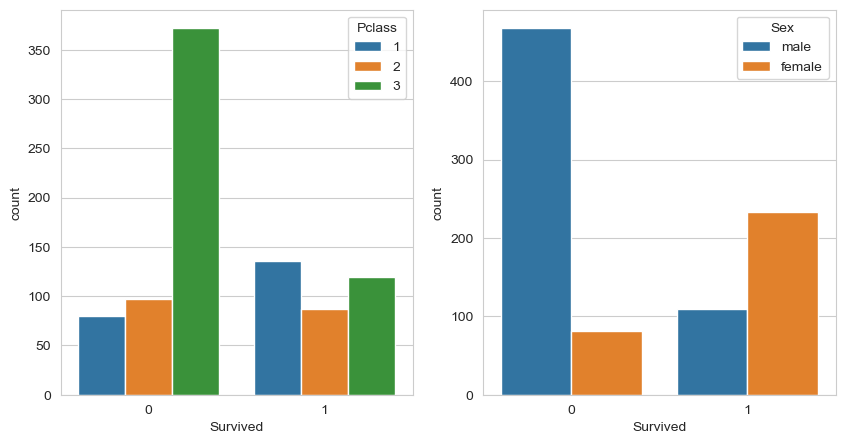

In [310]:
## Cat Vs Cat
output_var="Survived"
fig,ax = plt.subplots(1,2,figsize=(10,5))
for axi,x in zip(ax.flat,cat_vars):
    sns.countplot(x=output_var,hue=x,ax=axi , data=titanic_df)

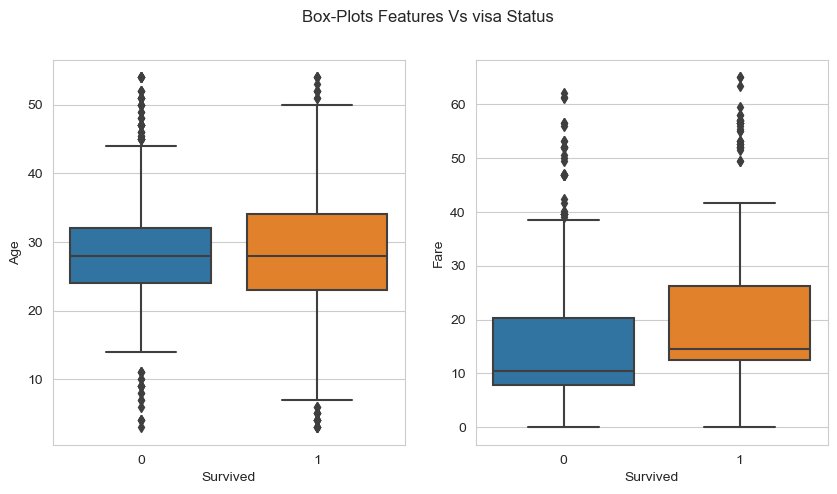

In [311]:
num_vars = ['Age', 'Fare']
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Box-Plots Features Vs visa Status')
sns.boxplot(ax=axes[0], x=output_var,y='Age', data=titanic_df)
sns.boxplot(ax=axes[1], x=output_var,y='Fare', data=titanic_df)
plt.show()

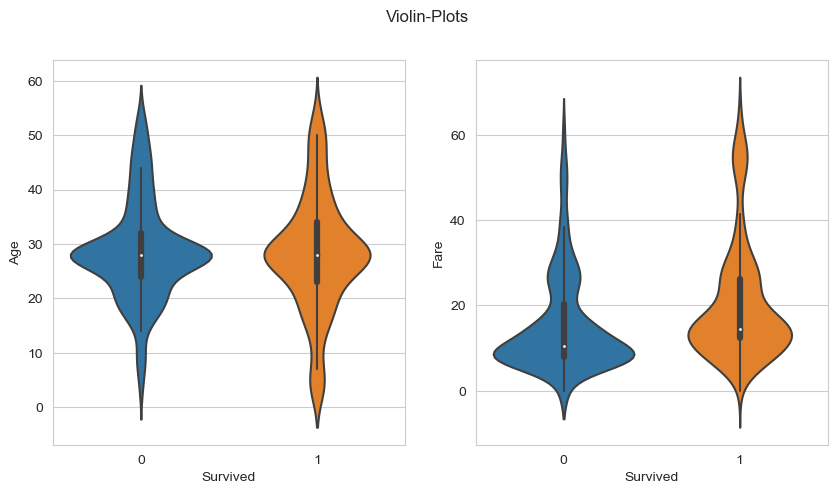

In [312]:
num_vars = ['Age', 'Fare']
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Violin-Plots')
sns.violinplot(ax=axes[0], x=output_var,y='Age', data=titanic_df)
sns.violinplot(ax=axes[1], x=output_var,y='Fare', data=titanic_df)
plt.show()

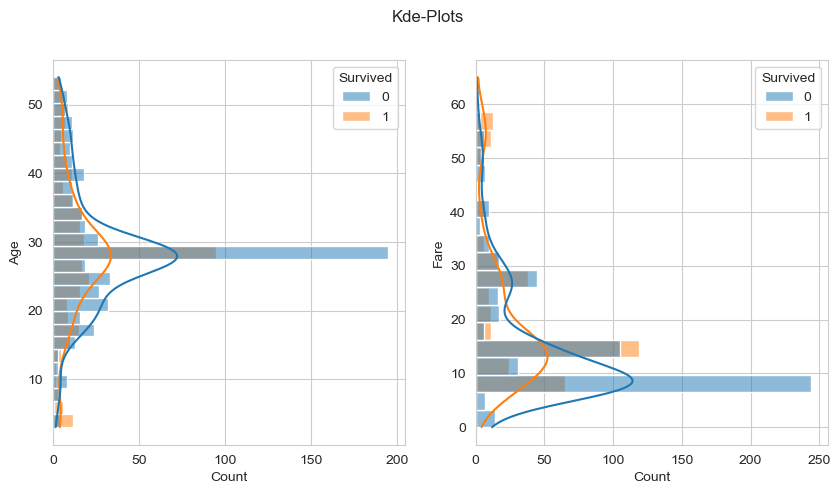

In [313]:
num_vars = ['Age', 'Fare']
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0], hue=output_var,y='Age', data=titanic_df,kde=True)
sns.histplot(ax=axes[1], hue=output_var,y='Fare', data=titanic_df,kde=True)
plt.show()

In [314]:
output_var="Survived"
from scipy.stats import chi2_contingency
for var in cat_vars:
    col1=titanic_df[var]
    col2=titanic_df[output_var]
    cross_tab = pd.crosstab(col1,col2)
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # Output the results
    print("Chi-square statistic:", chi2)
    print("p-value:", p)
    print("Degrees of freedom:", dof)
    print("========================================")


Chi-square statistic: 102.88898875696056
p-value: 4.549251711298793e-23
Degrees of freedom: 2
Chi-square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
Degrees of freedom: 1
Chi-square statistic: 37.2717929152043
p-value: 1.5585810465902147e-06
Degrees of freedom: 6
Chi-square statistic: 27.925784060236168
p-value: 9.703526421039997e-05
Degrees of freedom: 6
Chi-square statistic: 886.7768022383253
p-value: 7.352052198553542e-195
Degrees of freedom: 1


In [315]:
titanic_df[output_var].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [316]:
def point_bi_serial_coeff(con_var):
    # Compute means for pass and fail
    mean_pass = titanic_df[titanic_df[output_var] == 1][con_var].mean()
    mean_fail = titanic_df[titanic_df[output_var] == 0][con_var].mean()

    # Compute standard deviation
    std = titanic_df[con_var].std()

    # Compute number of cases
    n_pass = len(titanic_df[titanic_df[output_var] == 1])
    #print(n_pass)
    
    n_fail = len(titanic_df) - n_pass
    n_total = len(titanic_df)

    #print(mean_pass)
    #print(mean_fail)
    #print(std)
    #print(n_pass)
    #print(n_fail)
    #print(n_total)
    # Compute point-biserial correlation coefficient
    point_biserial_corr = (mean_pass - mean_fail) / (std) * np.sqrt((n_pass * n_fail) / (n_total**2 * (n_total - 1)))

    print("Point-biserial correlation coefficient:", point_biserial_corr)

In [317]:
num_vars = ['Age', 'Fare']
for i in num_vars:
    point_bi_serial_coeff(i)

Point-biserial correlation coefficient: -0.0006842898989851601
Point-biserial correlation coefficient: 0.006396247664215733


# 10. Convert-Cat-Dummies

In [318]:
inputs_cols = titanic_df.drop('Survived',axis=1)
inputs_cols

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,14.4542
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,28.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [319]:
# categorical -one hot encoding 
# for i in ['Pclass',"Sex"]:
#     dummy_df = pd.get_dummies(inputs_cols[i], prefix='Category', drop_first=True)

# #     # Concatenate the dummy variables with the original DataFrame
#     inputs_cols = pd.concat([inputs_cols, dummy_df], axis=1)
    
# inputs_cols.drop(['Sex','Pclass'],axis='columns',inplace=True)
# inputs_cols.head(3)

In [320]:
## one hot encoding
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
for i in ['Pclass','Sex',]:
    inputs_cols[i]=le.fit_transform(inputs_cols[i]) 


In [321]:
target_col = le.fit_transform(titanic_df.Survived)
#target_col=target_col.astype('int')

# 11. train -test -split

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_cols,target_col,test_size=0.2,random_state=42)

# 12. Model

In [323]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
print(model.score(X_test,Y_test))
print(model.score(X_train,Y_train))

0.5139664804469274
0.5252808988764045


# 13 Data - Transformations

In [324]:
inputs_cols['Fare']= np.log(inputs_cols['Fare']+1e-10)
#inputs_cols['Age']= np.log(inputs_cols['Age']+1e-10)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs_cols,target_col,test_size=0.2,random_state=42)

In [325]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
print(model.score(X_test,Y_test))
print(model.score(X_train,Y_train))

0.7821229050279329
0.7668539325842697


## Observations

 - One-hot encoder
 - train & test  0.75 & 0.76  - Without - adding Fare, Age Coulmns
 - train & test 0.70 & 0.71  - With  - adding - Fare,Age - Converting Normal Distribution
 
 - Label Encoder
 - train & test - 0.83 & 0.76 - With Out -adding Fare, Age Coulmns
 - train & test - 0.78 & 0.77 - With -adding - Fare,Age -  Converting Normal Distribution